In [9]:
import pandas as pd
import numpy as np
import os
from env import get_db_url
from pathlib import Path 
import csv


In [7]:
sql_query = """SELECT bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet, taxvaluedollarcnt,taxamount,fips
                FROM properties_2017
                JOIN propertylandusetype as pl using (propertylandusetypeid)
                WHERE pl.propertylandusetypeid = '261'"""

df = pd.read_sql(sql_query, get_db_url('zillow'))


In [36]:
df = pd.read_csv('zillow_project.csv')
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,6037.0
3,0.0,0.0,NaN,2108.0,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,6941.39,6037.0
...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,5302.70,6059.0


In [37]:
# Basic information about table, how many nulls are in each column 

df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 6 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   taxamount                     2148421 non-null  float64
 5   fips                          2152863 non-null  float64
dtypes: float64(6)
memory usage: 98.6 MB


In [38]:
# Basic information about table 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [39]:
#size o
df.size

12917178

In [40]:
#How many null values are in each column
df.isnull().sum()


bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
taxamount                       4442
fips                               0
dtype: int64

In [41]:
#From domain expertise I would impute the bedroomcnt and bathroomcnt

In [42]:
#Keeping original dataframe
original_df = df

In [43]:
#dropping rows where calculatedfinishedsquarefeet is null
df_calculatedfinishedsquarefeet_nulls = df[df['calculatedfinishedsquarefeet'].notna()]


In [45]:
#Checking columns for nulls
df_calculatedfinishedsquarefeet_nulls.isnull().sum()


bedroomcnt                         4
bathroomcnt                        4
calculatedfinishedsquarefeet       0
taxvaluedollarcnt                115
taxamount                       2687
fips                               0
dtype: int64

In [46]:
#df with taxamount nulls removed 
df_taxamount_nulls = df[df['taxamount'].notna()]

In [48]:
#removing rows with na values in calculatedfinishedsquarefeet column

df_custom = df[df['calculatedfinishedsquarefeet'].notna()]

In [51]:
#removing rows with na values in taxamount column

df_custom = df_custom[df_custom['taxamount'].notna()]

In [52]:
# Removing null values from calculatedfinishedsquarefeet 
# and taxamount removes most of nulls, still have nulls remaining for taxvaluedollarcnt
df_custom.isnull().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet     0
taxvaluedollarcnt               18
taxamount                        0
fips                             0
dtype: int64

In [53]:
#removing rows with na values 
df_custom = df_custom[df_custom['taxvaluedollarcnt'].notna()]

In [60]:
df_custom.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
taxamount                       0
fips                            0
dtype: int64

In [56]:
#shape after removing nulls
df_custom.shape

(2141674, 6)

In [58]:
#describing data of df_custom
df_custom.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2141674.0,3.300810,0.933552,0.00,3.0000,3.00,4.0000,25.00
bathroomcnt,2141674.0,2.240000,0.990999,0.00,2.0000,2.00,3.0000,32.00
calculatedfinishedsquarefeet,2141674.0,1863.194830,1221.898270,1.00,1257.0000,1623.00,2208.0000,952576.00
taxvaluedollarcnt,2141674.0,460590.199057,677104.218670,22.00,189075.0000,328204.50,534543.0000,90188462.00
taxamount,2141674.0,5616.127114,7813.868021,6.34,2540.0325,4110.88,6411.5575,1078101.87
fips,2141674.0,6048.327765,20.371386,6037.00,6037.0000,6037.00,6059.0000,6111.00


In [62]:
#no remaining null values 
df_custom.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141674 entries, 4 to 2152862
Data columns (total 6 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2141674 non-null  float64
 1   bathroomcnt                   2141674 non-null  float64
 2   calculatedfinishedsquarefeet  2141674 non-null  float64
 3   taxvaluedollarcnt             2141674 non-null  float64
 4   taxamount                     2141674 non-null  float64
 5   fips                          2141674 non-null  float64
dtypes: float64(6)
memory usage: 114.4 MB


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
columns = list(df_custom.columns)


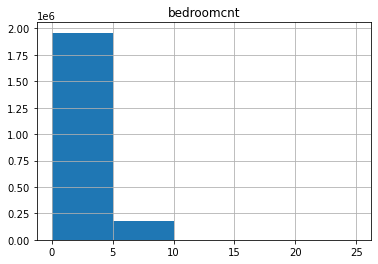

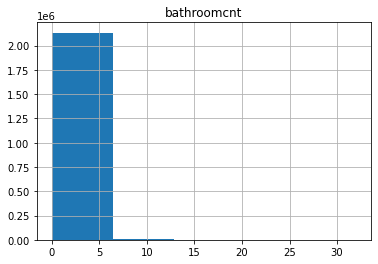

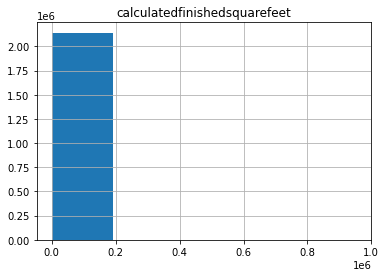

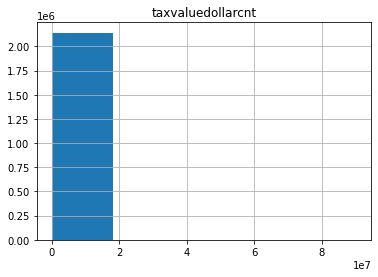

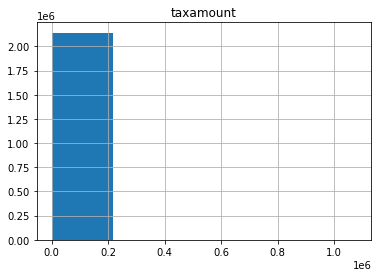

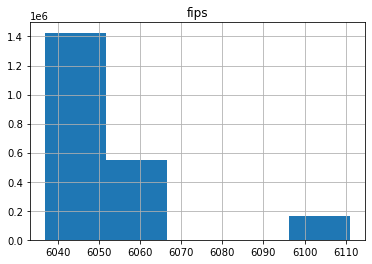

In [69]:
for i, col in enumerate(columns):
    df_custom[col].hist(bins=5)
    plt.title(col)
    plt.show()

In [81]:
def get_zillow_data():
    '''
    This function reads in zillow data from local copy as a df
    '''
        
    # Reads local copy of csv 
    df = pd.read_csv('zillow_project.csv')
    
    return df    

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,6037.0
3,0.0,0.0,NaN,2108.0,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,6941.39,6037.0
...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,5302.70,6059.0
